**• DOMAIN:** Telecom

**• CONTEXT:** A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt
to retain customers. The end goal is to develop focused customer retention programs

**• DATA DESCRIPTION:**Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents

**• PROJECT OBJECTIVE:** The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the
potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer
churn and will increase the focus on strategising customer retention.

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Understanding & Exploration:**

Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [ ]:
# variable Churn1 stores the data of TelcomCustomer-Churn_1.csv
churn1 = pd.read_csv("/content/drive/MyDrive/GREAT LEARNING/AIML/Ensemble Techniques/TelcomCustomer-Churn_1.csv")

**Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.**

In [ ]:
# variable Churn2 stores the data of TelcomCustomer-Churn_2.csv
churn2 = pd.read_csv("/content/drive/MyDrive/GREAT LEARNING/AIML/Ensemble Techniques/TelcomCustomer-Churn_2.csv")

**Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**

In [ ]:
# Merge the DataFrames on 'customerID'
merged_df = pd.merge(churn1, churn2, on='customerID', how='inner')

**Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.**

In [ ]:
# Check if all columns are present using set comparison
all_columns_present = set(churn1.columns) <= set(merged_df.columns) and set(churn2.columns) <= set(merged_df.columns)

print(all_columns_present)
if all_columns_present:
    print("All columns from both DataFrames are incorporated in the merged DataFrame.")
else:
    print("Not all columns are present in the merged DataFrame.")


True
All columns from both DataFrames are incorporated in the merged DataFrame.


**2. Data Cleaning & Analysis:**

**Impute missing/unexpected values in the DataFrame.**

In [ ]:
merged_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
merged_df = merged_df.drop(columns=['customerID'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
merged_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Impute missing values
def impute_missing_values(merged_df):
    # Impute numerical columns with mean/median
    for col in merged_df.select_dtypes(include=['int64', 'float64']):
        if merged_df[col].isnull().any():
            merged_df[col] = merged_df[col].fillna(merged_df[col].mean() if col in merged_df.select_dtypes(include=['int64']) else merged_df[col].median())

    # Impute categorical columns with mode
    for col in merged_df.select_dtypes(include='object'):
        if merged_df[col].isnull().any():
            merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

    return merged_df

# Impute missing values
merged_df = impute_missing_values(merged_df.copy())

In [ ]:
#convert the columns with an 'object' datatype into categorical variables
for feature in merged_df.columns: # Loop through all columns in the dataframe
    if merged_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        merged_df[feature] = pd.Categorical(merged_df[feature])# Replace strings with an integer


merged_df['SeniorCitizen'] = pd.Categorical(merged_df['SeniorCitizen'])

In [ ]:
#checks the variables are converted to categorical variables
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [ ]:
#checks the categories in the categorical variables
print(merged_df.gender.value_counts())
print(merged_df.SeniorCitizen.value_counts())
print(merged_df.Partner.value_counts())
print(merged_df.Dependents.value_counts())
print(merged_df.PhoneService.value_counts())
print(merged_df.MultipleLines.value_counts())
print(merged_df.OnlineSecurity.value_counts())
print(merged_df.DeviceProtection.value_counts())
print(merged_df.TechSupport.value_counts())
print(merged_df.StreamingTV.value_counts())
print(merged_df.StreamingMovies.value_counts())
print(merged_df.Contract.value_counts())
print(merged_df.PaperlessBilling.value_counts())
print(merged_df.PaymentMethod.value_counts())
print(merged_df.Churn.value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
StreamingMovies
No                     2785
Yes                    2732
No internet 

In [ ]:
merged_df.isnull().sum() # to check for any null values in the columns

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


**Make sure all the variables with continuous values are of ‘Float’ type.**

[For Example: MonthlyCharges, TotalCharges]

In [ ]:
#change the continuous values to Float Data Type
merged_df['TotalCharges']=pd.to_numeric(merged_df['TotalCharges'], errors='coerce') # converts 'TotalCharges' column to float data type
merged_df['TotalCharges'].fillna(merged_df['TotalCharges'].mean(), inplace=True) # fills the empty data in 'TotalCharges' with mean of the values
merged_df['TotalCharges']=merged_df['TotalCharges'].astype(float)
merged_df['tenure']=merged_df['tenure'].astype(float)


<ipython-input-25-904c0f18cfd7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['TotalCharges'].fillna(merged_df['TotalCharges'].mean(), inplace=True) # fills the empty data in 'TotalCharges' with mean of the values


In [ ]:
merged_df.info() # to check the continuos values are converted to float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float64 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

**Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features.**


<ipython-input-27-d279b15238b2>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col).size().plot(kind='pie', autopct='%.2f')
<ipython-input-27-d279b15238b2>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col).size().plot(kind='pie', autopct='%.2f')
<ipython-input-27-d279b15238b2>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col).size().plot(kind='pie', autopct='%.2f')
<ipython-i

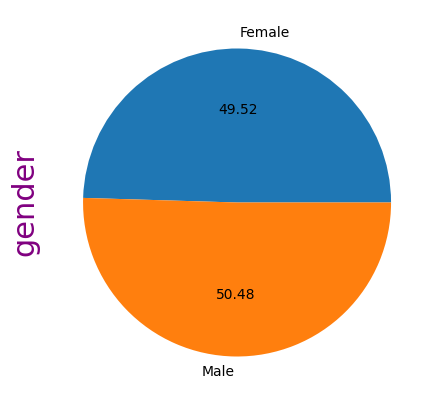

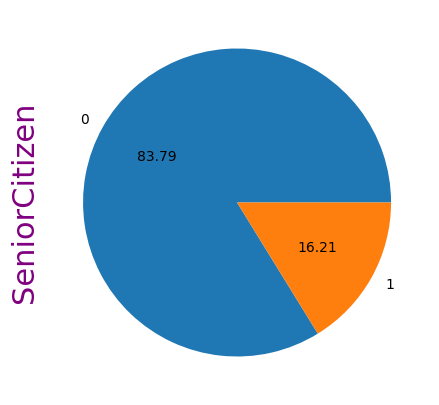

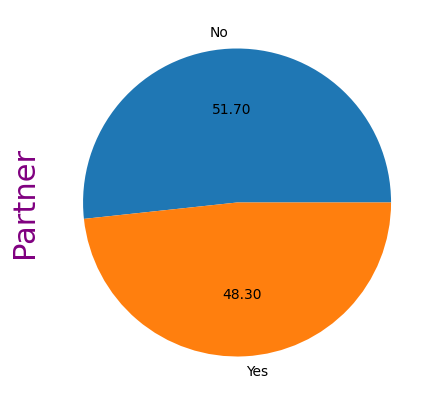

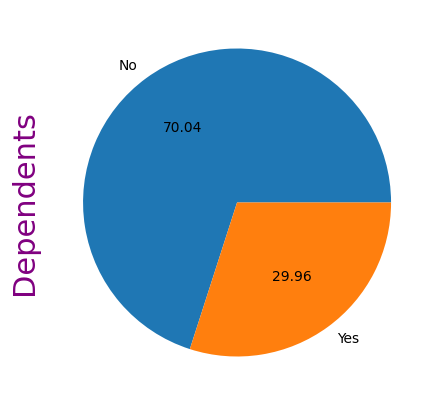

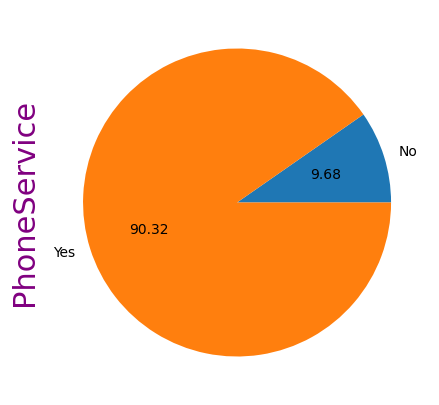

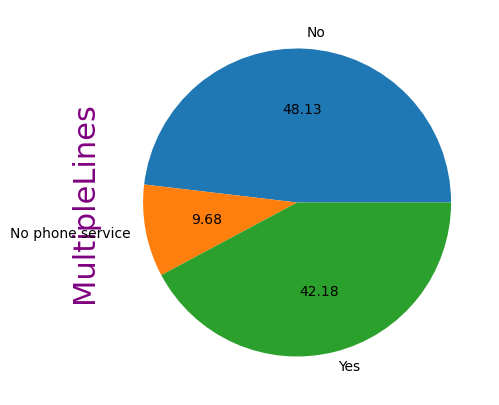

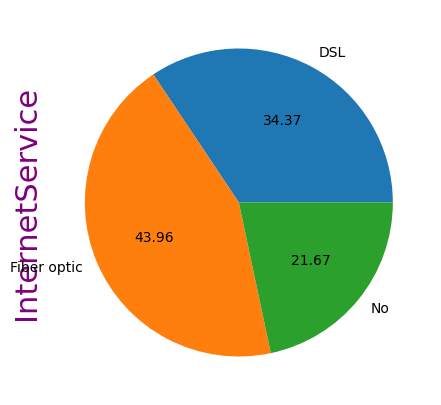

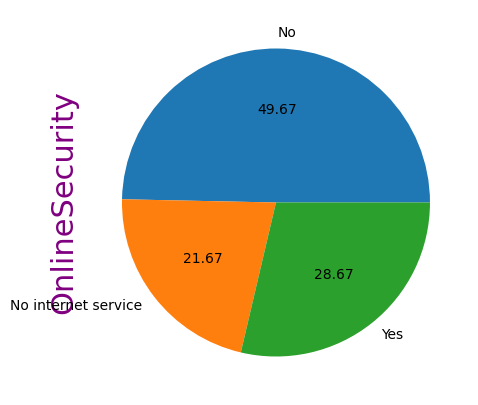

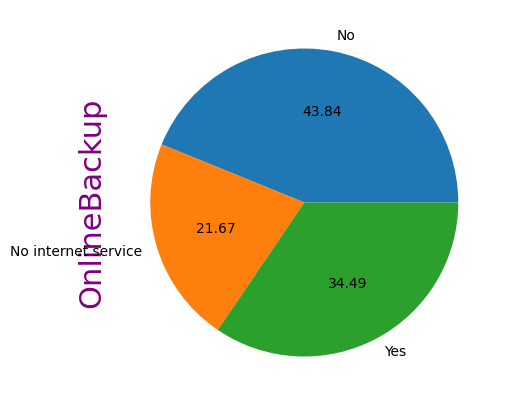

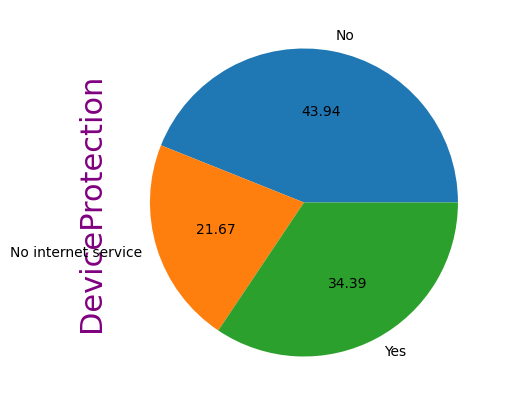

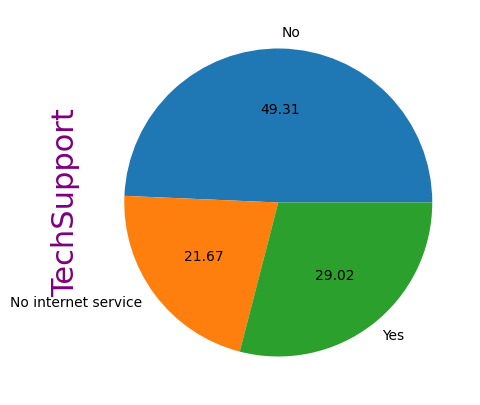

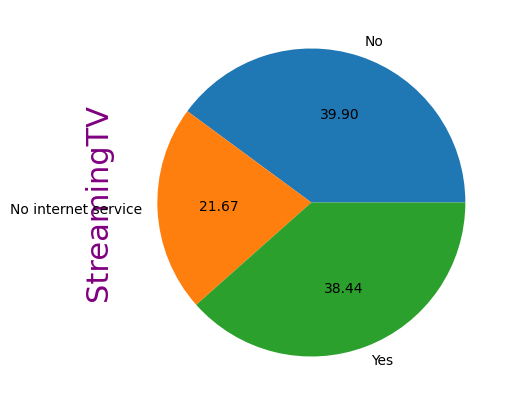

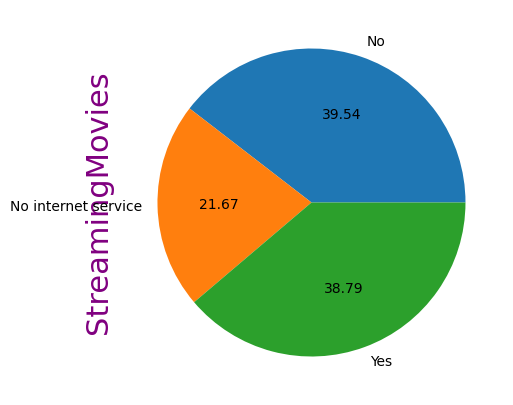

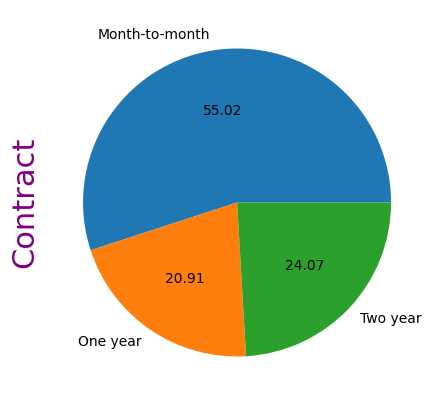

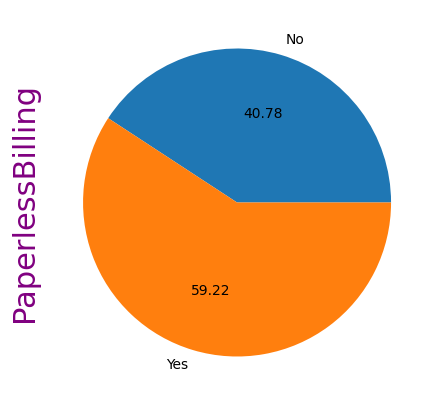

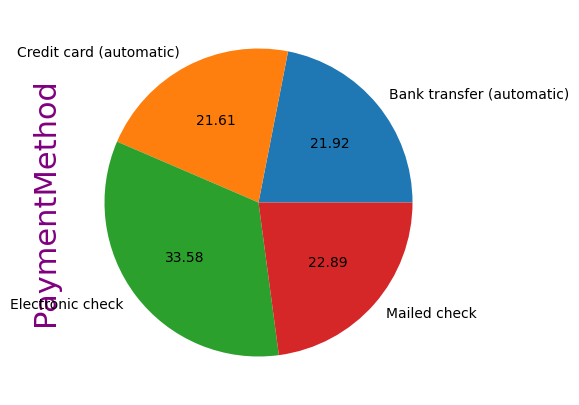

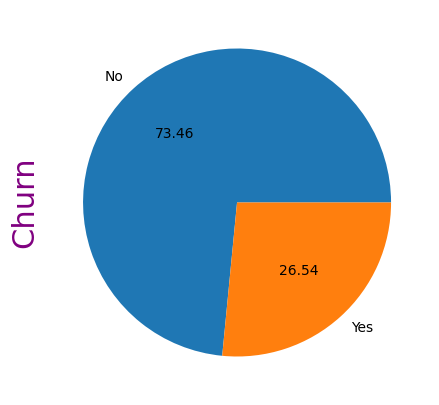

In [ ]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt

def piechart(df):
    categorical = merged_df.select_dtypes('category').columns
    categorical_columns = merged_df[categorical].nunique()

    i = 1
    for col in categorical_columns.index:
        fig, axs = plt.subplots(ncols = 1, figsize=(10, 5))
        plt.figure(i)
        df.groupby(col).size().plot(kind='pie', autopct='%.2f')

        axs.set_ylabel(col, size=22)
        axs.yaxis.label.set_color('purple')
        axs.xaxis.label.set_color('green')
        axs.spines['bottom'].set_color('red')
        axs.spines['top'].set_color('red')

        i = i+1
    plt.show()


piechart(merged_df)


*   Few coulumns have a inappropriate catrgory as 'No internet service' and Multiple lines column has 'No phone Service' which has to be replace with value as 'No'

*   Payment method, paperless billing, contract, streaming movies and other inappropriate columns must be encoded properly



**Encode all the appropriate Categorical features with the best suitable approach.**

In [ ]:
#replace the No internet service and No phone service values by no in all the columns
merged_df.replace('No internet service', 'No', inplace=True)
merged_df.replace('No phone service', 'No', inplace=True)

<ipython-input-28-c4f329d62222>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  merged_df.replace('No internet service', 'No', inplace=True)
<ipython-input-28-c4f329d62222>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  merged_df.replace('No phone service', 'No', inplace=True)


In [ ]:
for column in merged_df:
    print(f'- {column}: {merged_df[column].unique()}')
    print("")

- gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']

- SeniorCitizen: [0, 1]
Categories (2, int64): [0, 1]

- Partner: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']

- Dependents: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

- tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]

- PhoneService: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

- MultipleLines: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

- InternetService: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']

- OnlineSecurity: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

- OnlineBackup: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']

- DeviceProtection: ['No', 'Yes']
Categories (2, ob

In [ ]:
#replacing the caetegorical values
category_value = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                  'Churn', 'gender','InternetService','PaymentMethod','Contract']


replace_vals = {'Yes': 1, 'No': 0, 'Male': 1,'Female': 0,'Month-to-month': 3, 'One year': 1, 'Two year': 2, 'DSL': 1, 'Fiber optic':2, 'No' :0,
                'Electronic check':0, 'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}
for col in category_value:
    merged_df[col].replace(replace_vals, inplace=True)
for column in merged_df:
    print(f'- {column}: {merged_df[column].unique()}')
    print("")

- gender: [0, 1]
Categories (2, int64): [0, 1]

- SeniorCitizen: [0, 1]
Categories (2, int64): [0, 1]

- Partner: [1, 0]
Categories (2, int64): [0, 1]

- Dependents: [0, 1]
Categories (2, int64): [0, 1]

- tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]

- PhoneService: [0, 1]
Categories (2, int64): [0, 1]

- MultipleLines: [0, 1]
Categories (2, int64): [0, 1]

- InternetService: [1, 2, 0]
Categories (3, int64): [1, 2, 0]

- OnlineSecurity: [0, 1]
Categories (2, int64): [0, 1]

- OnlineBackup: [1, 0]
Categories (2, int64): [0, 1]

- DeviceProtection: [0, 1]
Categories (2, int64): [0, 1]

- TechSupport: [0, 1]
Categories (2, int64): [0, 1]

- StreamingTV: [0, 1]
Categories (2, int64): [0, 1]

- StreamingMovies: [0, 1]
Categories (2, 

<ipython-input-30-f9d329497224>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].replace(replace_vals, inplace=True)
<ipython-input-30-f9d329497224>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col].replace(replace_vals, inplace=True)
<ipython-input-30-f9d329497224>:10

**Split the data into 80% train and 20% test.**

In [ ]:
#split X and y values
#assign all independent columns to x dropping the column 'Churn'
#assign the dependent variable 'churn' to the y
X = merged_df.drop(["Churn"], axis=1)
y = merged_df['Churn']

#split data with 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)
X_train.shape


(5634, 19)

**Normalize/Standardize the data with the best suitable approach**

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train) #Standardize the train data
X_test_scaled = scalar.transform(X_test)#Standardize the test data


**Model building and performance improvement :**

**Train a model using Decision tree and check the performance of the model on train and test data**



In [ ]:
#import the decision tree library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#build a decisiontreeclassifier model and fit the model
dTree = DecisionTreeClassifier(criterion = 'gini',random_state= 1)
dTree.fit(X_train_scaled, y_train)

# Predict on train and test data
y_train_pred_dTree =dTree.predict(X_train_scaled)
y_test_pred_dTree = dTree.predict(X_test_scaled)

Confusion matrix for Decision Tree Model


<Axes: >

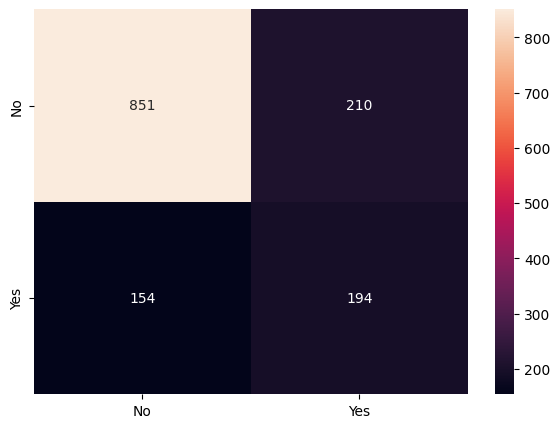

In [ ]:
#print the confusion matrix for Decision Tree Model
print("Confusion matrix for Decision Tree Model")
cm= confusion_matrix(y_test, y_test_pred_dTree,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#print the performance of Decision tree model for Train and Test Data
print(f"Performance on Train Data on Decisiontree Model")
print(classification_report(y_train, y_train_pred_dTree))
print("")
print(f"Performance on Test Data on Decisiontree Model")
print(classification_report(y_test, y_test_pred_dTree))


Performance on Train Data on Decisiontree Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      0.99      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


Performance on Test Data on Decisiontree Model
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1061
           1       0.48      0.56      0.52       348

    accuracy                           0.74      1409
   macro avg       0.66      0.68      0.67      1409
weighted avg       0.76      0.74      0.75      1409



# **Decision tree model**
 **Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data ,  the
differences observed in performance**

In [ ]:
#import the necessary libararies to implement gridsearch
from sklearn.model_selection import GridSearchCV

#create dictionary with the posssible hyperparameters for tuning
param_grid = {
  'criterion': ['gini', 'entropy'],  # Impurity measure for splitting
  'max_depth': [2, 4, 6, 8],  # Maximum depth of the tree
  'min_samples_split': [2, 5, 10],  # Minimum samples required for splitting
  'min_samples_leaf': [1, 2, 4]   # Minimum samples required at leaf nodes
}

#build a gridsearch model
grid_search_dt = GridSearchCV(dTree, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation for accuracy

#Train the gridsearch model
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Get the best model and its parameters
best_model_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

print(best_params_dt)
print(best_model_dt)
# Predict on train and test data
y_train_pred_dTreegs = best_model_dt.predict(X_train_scaled)
y_test_pred_dTreegs = best_model_dt.predict(X_test_scaled)

# Calculate accuracy on train and test data
train_accuracydt = accuracy_score(y_train, y_train_pred_dTreegs)
test_accuracydt = accuracy_score(y_test, y_test_pred_dTreegs)


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, random_state=1)


Confusion matrix for Decision Tree Model after Gridsearch



<Axes: >

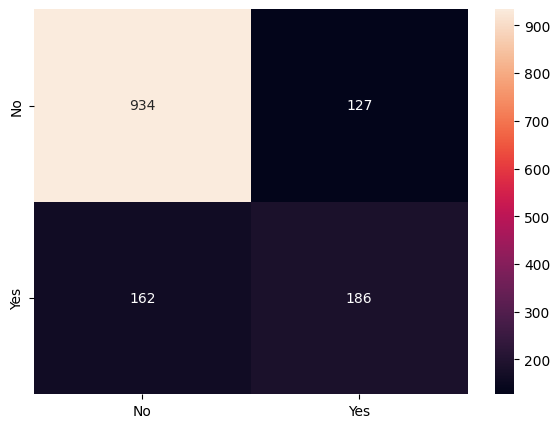

In [ ]:
#print the confusion matrix for Decision Tree Model after Gridsearch
print("Confusion matrix for Decision Tree Model after Gridsearch")
print("")
y_predict = best_model_dt.predict(X_test_scaled)

cm= confusion_matrix(y_test, y_test_pred_dTreegs,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#print the performance of Decision tree model for Train and Test Data
print(f"Performance on Train Data on Decisiontree Model")
print(classification_report(y_train, y_train_pred_dTree))
print("")
print(f"Performance on Test Data on Decisiontree Model")
print(classification_report(y_test, y_test_pred_dTree))


#print the Hyperparameters of improved Decisiontree Model using Gridsearch
print("The Hyperparameters of improved Decisiontree Model: ",best_params_dt)
print("")

#print the Imporoved Performance on Train and Test Data using Gridsearch
print(f"Imporoved Performance on Train Data on Decisiontree Model Data using Gridsearch:")
print(classification_report(y_train, y_train_pred_dTreegs))
print("")
print(f"Imporoved Performance on Test Data on Decisiontree Model using Gridsearch: ")
print(classification_report(y_test, y_test_pred_dTreegs))

print("")
performance_data = []


#append the performance metrics to the performance_data
performance_data.append({
        'Model': "Decisiontree Model",
        'Train-Test Difference before Tuning': (accuracy_score(y_train, y_train_pred_dTree) - accuracy_score(y_test, y_test_pred_dTree)),
        'Train Accuracy': accuracy_score(y_train, y_train_pred_dTreegs),
        'Test Accuracy': accuracy_score(y_test, y_test_pred_dTreegs),
        'Precision': precision_score(y_test, y_test_pred_dTreegs),
        'Recall': recall_score(y_test, y_test_pred_dTreegs),
        'F1-Score': f1_score(y_test, y_test_pred_dTreegs)
    })



Performance on Train Data on Decisiontree Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      0.99      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


Performance on Test Data on Decisiontree Model
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1061
           1       0.48      0.56      0.52       348

    accuracy                           0.74      1409
   macro avg       0.66      0.68      0.67      1409
weighted avg       0.76      0.74      0.75      1409

The Hyperparameters of improved Decisiontree Model:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Imporoved Performance on Train Data on Decisiontree Model Data using Gridsearch:
              precision    rec

# Performance Observations between Initial Decision Tree Model and Tuned Decision Tree Model  :
*   Using Gridsearch the performance of the Decisiontree Model increased drastically
*   The comparing the performance on train and test data of **initial Decisiontree model**, it clearly it indicates **the model is overfit**

*   After the tuning the hyperparameters of the Decion tree model with **using Gridsearch the performance of the model improved**.

*  After the tuning the model, the performance on train and test data is similar which shows the **improved model using Gridsearch is the best fit**

*   The **F1 Score and Accuraccy** of the test data has **improved in the tuned Dtree model** compared to the initial model



**Train a model using Random forest and check the performance of the model on train and test data**

In [ ]:
#import the libraries for Randomforest classifier model
from sklearn.ensemble import RandomForestClassifier

#build the Randomforest classifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train_scaled, y_train)

#predict the Randomforest classifier model
y_train_pred_rfcl =rfcl.predict(X_train_scaled)
y_test_pred_rfcl = rfcl.predict(X_test_scaled)


Confusion matrix for Randomforest classifier Model


<Axes: >

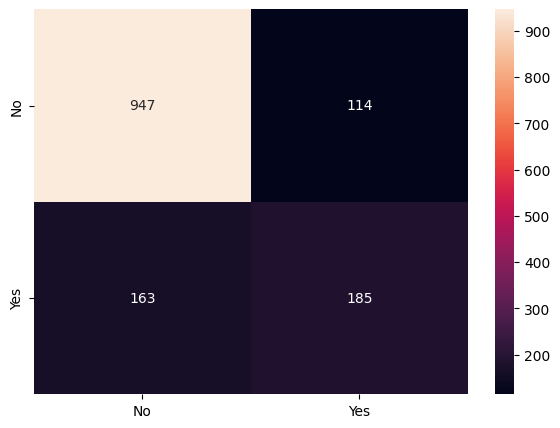

In [ ]:
#print the confusion matrix for Randomforest classifier Model
print("Confusion matrix for Randomforest classifier Model")
cm= confusion_matrix(y_test, y_test_pred_rfcl,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#print the performance of Randomforest classifier model for Train and Test Data
print(f"Performance on Train Data on Randomforest classifier model")
print(classification_report(y_train,y_train_pred_rfcl))
print("")
print(f"Performance on Test Data on Randomforest classifier model")
print(classification_report(y_test, y_test_pred_rfcl))

Performance on Train Data on Randomforest classifier model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      0.99      0.99      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


Performance on Test Data on Randomforest classifier model
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.62      0.53      0.57       348

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409



# **Random tree model**
**Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , the
differences observed in performance**

In [ ]:
#Define Hyperparameter Grid
param_grid = {
  'n_estimators': [100, 200, 300],  # Number of trees in the forest
  'max_depth': [2, 4, 6, 8],  # Maximum depth of each tree
  'min_samples_split': [2, 5, 10],  # Minimum samples required for splitting
  'min_samples_leaf': [1, 2, 4]   # Minimum samples required at leaf nodes
}

#build a gridsearch model
grid_search_rfcl = GridSearchCV(rfcl, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation for accuracy

#Train the Model
grid_search_rfcl.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=12, n_estimators=50,
                                              random_state=1),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Get the best model and its parameters
best_model_rfcl = grid_search_rfcl.best_estimator_
best_params_rfcl = grid_search_rfcl.best_params_

print(best_model_rfcl)
print(best_params_rfcl)

# Predict on train and test data
y_train_pred_rfclgs = best_model_rfcl.predict(X_train_scaled)
y_test_pred_rfclgs = best_model_rfcl.predict(X_test_scaled)

# Calculate accuracy on train and test data
train_accuracyrfcl = accuracy_score(y_train, y_train_pred_rfclgs)
test_accuracyrfcl = accuracy_score(y_test, y_test_pred_rfclgs)

RandomForestClassifier(max_depth=6, max_features=12, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=1)
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Confusion matrix for Randomforest classifier model after Gridsearch

0.8090844570617459


<Axes: >

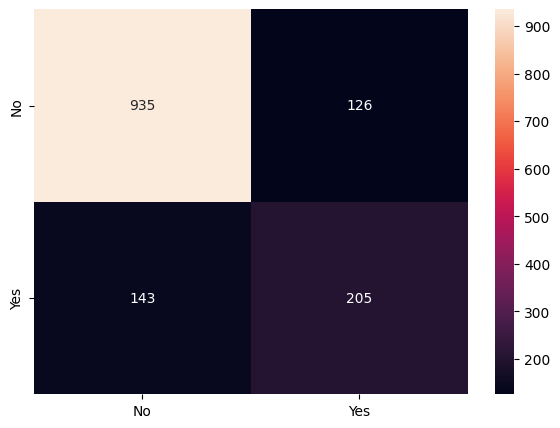

In [ ]:
#print the confusion matrix for Randomforest classifier model after Gridsearch
print("Confusion matrix for Randomforest classifier model after Gridsearch")
print("")
y_predict_rfcl = best_model_rfcl.predict(X_test_scaled)
print(best_model_rfcl.score(X_test_scaled , y_test))

cm= confusion_matrix(y_test, y_test_pred_rfclgs,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#print the performance of Randomforest classifier model for Train and Test Data
print(f"Performance on Train Data on Randomforest classifier model")
print(classification_report(y_train,y_train_pred_rfcl))
print("")
print(f"Performance on Test Data on Randomforest classifier model")
print(classification_report(y_test, y_test_pred_rfcl))


#print the Improved Performance on Train and Test Data on Randomforest classifier using Gridsearch
print("The Hyperparameters of improved Randomforest classifier model: ",best_params_rfcl)
print("")

print(f"Improved Performance on Train Data on Randomforest classifier model using Gridsearch:")
print(classification_report(y_train, y_train_pred_rfclgs))
print("")
print(f"Improved Performance on Test Data on Randomforest classifier model using Gridsearch: ")
print(classification_report(y_test, y_test_pred_rfclgs))

print("")

#append the performance metrics to the performance_data
performance_data.append({
        'Model': "Randomforest classifier",
        'Train-Test Difference before Tuning': (accuracy_score(y_train,y_train_pred_rfcl) - accuracy_score(y_test,y_test_pred_rfcl)),
        'Train Accuracy': accuracy_score(y_train, y_train_pred_rfclgs),
        'Test Accuracy': accuracy_score(y_test, y_test_pred_rfclgs),
        'Precision': precision_score(y_test, y_test_pred_rfclgs),
        'Recall': recall_score(y_test, y_test_pred_rfclgs),
        'F1-Score': f1_score(y_test, y_test_pred_rfclgs)
    })

Performance on Train Data on Randomforest classifier model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      0.99      0.99      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


Performance on Test Data on Randomforest classifier model
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.62      0.53      0.57       348

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409

The Hyperparameters of improved Randomforest classifier model:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Improved Performance on Train Data on Randomforest classifier model using Gri

# Performance Observations in Random tree Model:
*   Using Gridsearch the performance of the Random tree Model increased drastically
*   The comparing the performance on train and test data of **initial Random tree Model**, it clearly it indicates **the model is overfit**

*   After the tuning the hyperparameters of the Decion tree model with **using Gridsearch the performance of the Random tree Model improved**.

*  After the tuning the model, the performance on train and test data is similar which shows the **improved model using Gridsearch is the best fit**

*   The **F1 Score and Accuracy** of the test data has **improved in the tuned Random tree Model** compared to the initial model

**Train a model using Adaboost and check the performance of the model on train and test data**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#build Adaboost Model
abcl = AdaBoostClassifier(dTree, random_state=1)

abcl = abcl.fit(X_train_scaled, y_train)

# Predict on train and test data
y_train_pred_abcl = abcl.predict(X_train_scaled)
y_test_pred_abcl = abcl.predict(X_test_scaled)


Confusion matrix for  Adaboost model


<Axes: >

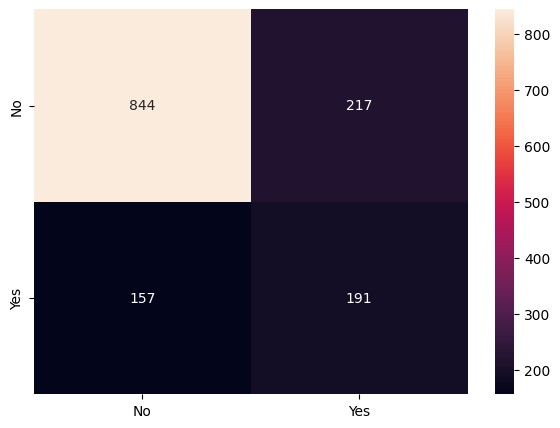

In [ ]:
#print the confusion matrix for Adaboost model
print("Confusion matrix for  Adaboost model")
cm= confusion_matrix(y_test, y_test_pred_abcl,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#print the performance of  Adaboost model for Train and Test Data
print(f"Performance on Train Data on Adaboost model")
print(classification_report(y_train, y_train_pred_abcl))
print("")
print(f"Performance on Test Data on Adaboost model")
print(classification_report(y_test, y_test_pred_abcl))

Performance on Train Data on Adaboost model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       0.99      1.00      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


Performance on Test Data on Adaboost model
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1061
           1       0.47      0.55      0.51       348

    accuracy                           0.73      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.75      0.73      0.74      1409



**Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , the
differences observed in performance**

In [ ]:
#define the parameter grid

param_grid = {
        'n_estimators': [50, 100, 200], # Number of boosting stages
        'learning_rate': [0.1, 0.5, 1.0], # Learning rate for each boosting stage
        'estimator__max_depth': [2, 4, 8]   # Maximum depth of base decision trees (within AdaBoost)
    }

#build a gridsearch model
grid_search_abcl = GridSearchCV(abcl, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation for accuracy

#Train the Model
grid_search_abcl.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1),
                                          random_state=1),
             param_grid={'estimator__max_depth': [2, 4, 8],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get the best model and its parameters
best_model_abcl = grid_search_abcl.best_estimator_
best_params_abcl = grid_search_abcl.best_params_

# Predict on train and test data
y_train_pred_abclgs = best_model_abcl.predict(X_train_scaled)
y_test_pred_abclgs = best_model_abcl.predict(X_test_scaled)

# Calculate accuracy on train and test data
train_accuracy_abcl = accuracy_score(y_train, y_train_pred_abclgs)
test_accuracy_abcl = accuracy_score(y_test, y_test_pred_abclgs)

Confusion matrix for Adaboost model after Gridsearch



<Axes: >

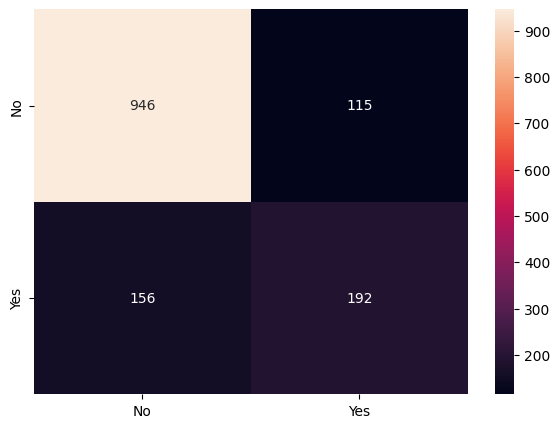

In [ ]:
#print the confusion matrix for Adaboost model after Gridsearch
print("Confusion matrix for Adaboost model after Gridsearch")
print("")
y_predict = best_model_abcl.predict(X_test_scaled)

cm= confusion_matrix(y_test, y_test_pred_abclgs,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#print the performance of  Adaboost model for Train and Test Data
print(f"Performance on Train Data on Adaboost model")
print(classification_report(y_train, y_train_pred_abcl))
print("")
print(f"Performance on Test Data on Adaboost model")
print(classification_report(y_test, y_test_pred_abcl))

#print the hyper paraeters of the tuned adaboost model
print("The Hyperparameters of improved Adaboost model: ",best_params_abcl)
print("")


print(f"Improved Performance on Train Data on Adaboost model using Gridsearch:")
print(classification_report(y_train, y_train_pred_abclgs))
print("")
print(f"Improved Performance on Test Data on Adaboost model using Gridsearch: ")
print(classification_report(y_test, y_test_pred_abclgs))

print("")

#append the performance metrics to the performance_data
performance_data.append({
        'Model': "Adaboost model",
        'Train-Test Difference before Tuning': (accuracy_score(y_train, y_train_pred_abcl) - accuracy_score(y_test, y_test_pred_abcl)),
        'Train Accuracy': accuracy_score(y_train, y_train_pred_abclgs),
        'Test Accuracy': accuracy_score(y_test, y_test_pred_abclgs),
        'Precision': precision_score(y_test, y_test_pred_abclgs),
        'Recall': recall_score(y_test, y_test_pred_abclgs),
        'F1-Score': f1_score(y_test, y_test_pred_abclgs)
    })


Performance on Train Data on Adaboost model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       0.99      1.00      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


Performance on Test Data on Adaboost model
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1061
           1       0.47      0.55      0.51       348

    accuracy                           0.73      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.75      0.73      0.74      1409

The Hyperparameters of improved Adaboost model:  {'estimator__max_depth': 2, 'learning_rate': 0.5, 'n_estimators': 200}

Improved Performance on Train Data on Adaboost model using Gridsearch:
              precision    recall  f1-score   support

           

# Performance Observations in Adaboost Model:
*   Using Gridsearch the performance of the Adaboost model **increased drastically**
*   The comparing the performance on train and test data of **initial Adaboost model**, it clearly it indicates **the model is overfit**

*   After the tuning the hyperparameters of the Decion tree model with **using Gridsearch the performance of the Adaboost model improved**.

*  After the tuning the model, the performance on train and test data is similar which shows the** improved model using Gridsearch is the best fit**

*   The **F1 Score and Accuracy** of the test data has **improved in the tuned Adaboost model** compared to the initial model

**Train a model using GradientBoost and check the performance of the model on train and test data**

In [ ]:
#import the necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

#buld the GradientBoost Model

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train_scaled, y_train)


# Predict on train and test data
y_train_pred_gbcl = gbcl.predict(X_train_scaled)
y_test_pred_gbcl = gbcl.predict(X_test_scaled)

Confusion matrix for GradientBoost model


<Axes: >

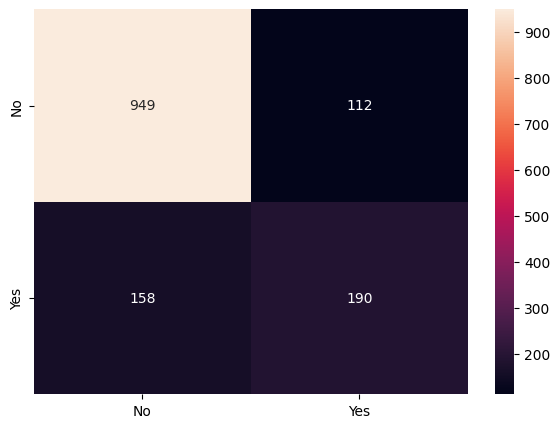

In [ ]:
#print the confusion matrix for GradientBoost model
print("Confusion matrix for GradientBoost model")
cm= confusion_matrix(y_test, y_test_pred_gbcl,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#print the performance of GradientBoost for Train and Test Data
print(f"Performance on Train Data on GradientBoost model using Gridsearch:")
print(classification_report(y_train, y_train_pred_gbcl))
print("")
print(f"Performance on Test Data on GradientBoost model using Gridsearch: ")
print(classification_report(y_test, y_test_pred_gbcl))


Performance on Train Data on GradientBoost model using Gridsearch:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4113
           1       0.70      0.54      0.61      1521

    accuracy                           0.81      5634
   macro avg       0.77      0.73      0.74      5634
weighted avg       0.80      0.81      0.81      5634


Performance on Test Data on GradientBoost model using Gridsearch: 
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.55      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



**Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data ,
the differences observed in performance**

In [ ]:
#define the parameter grid
param_grid = {
  'n_estimators': [50, 100, 200],  # Number of boosting stages
  'learning_rate': [0.1, 0.5, 1.0],  # Learning rate for each boosting stage
  'max_depth': [2, 4, 8]  # Maximum depth of individual decision trees
}
#build a gridsearch model
grid_search_gbcl = GridSearchCV(gbcl, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation for accuracy

#Train the Model
grid_search_gbcl.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=50,
                                                  random_state=1),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [2, 4, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get the best model and its parameters
best_model_gbcl = grid_search_gbcl.best_estimator_
best_params_gbcl = grid_search_gbcl.best_params_

print(best_model_gbcl)
print(best_params_gbcl)

# Predict on train and test data
y_train_pred_gbclgs = best_model_gbcl.predict(X_train_scaled)
y_test_pred_gbclgs = best_model_gbcl.predict(X_test_scaled)

# Calculate accuracy on train and test data
train_accuracy_gbcl = accuracy_score(y_train, y_train_pred_gbclgs)
test_accuracy_gbcl = accuracy_score(y_test, y_test_pred_gbclgs)


GradientBoostingClassifier(max_depth=2, random_state=1)
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


Confusion matrix for GradientBoost model after Gridsearch



<Axes: >

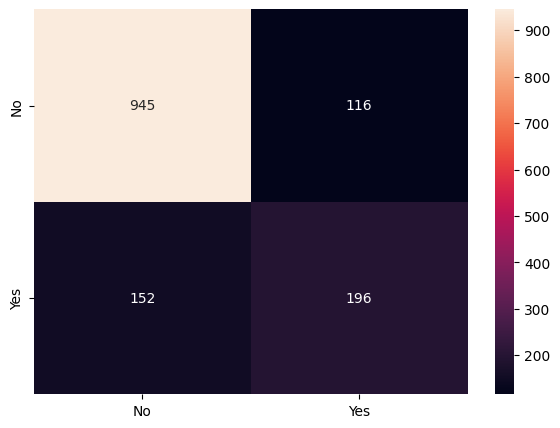

In [ ]:
#print the confusion matrix for GradientBoost model after Gridsearch
print("Confusion matrix for GradientBoost model after Gridsearch")
print("")
y_predict = best_model_gbcl.predict(X_test_scaled)

cm= confusion_matrix(y_test, y_test_pred_gbclgs,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#print the performance of GradientBoost model  for Train and Test Data
print(f"Performance on Train Data on GradientBoost model")
print(classification_report(y_train, y_train_pred_gbcl))
print("")
print(f"Performance on Test Data on GradientBoost model")
print(classification_report(y_test, y_test_pred_gbcl))

#print the Improved Performance on Train and Test Data using Gridsearch
print("The Hyperparameters of improved GradientBoost model: ",best_params_gbcl)
print("")

print(f"Improved Performance on Train Data on GradientBoost model using Gridsearch:")
print(classification_report(y_train, y_train_pred_gbclgs))
print("")
print(f"Improved Performance on Test Data on GradientBoost model using Gridsearch: ")
print(classification_report(y_test, y_test_pred_gbclgs))

print("")

#append the performance metrics to the performance_data
performance_data.append({
        'Model': "GradientBoost model",
        'Train-Test Difference before Tuning': (accuracy_score(y_train, y_train_pred_gbcl) - accuracy_score(y_test, y_test_pred_gbcl)),
        'Train Accuracy': accuracy_score(y_train, y_train_pred_gbclgs),
        'Test Accuracy': accuracy_score(y_test, y_test_pred_gbclgs),
        'Precision': precision_score(y_test, y_test_pred_gbclgs),
        'Recall': recall_score(y_test, y_test_pred_gbclgs),
        'F1-Score': f1_score(y_test, y_test_pred_gbclgs)
    })

Performance on Train Data on GradientBoost model
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4113
           1       0.70      0.54      0.61      1521

    accuracy                           0.81      5634
   macro avg       0.77      0.73      0.74      5634
weighted avg       0.80      0.81      0.81      5634


Performance on Test Data on GradientBoost model
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.55      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

The Hyperparameters of improved GradientBoost model:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

Improved Performance on Train Data on GradientBoost model using Gridsearch:
              precision    recall  f1-score   support

  

# Performance Observations in Gradientboost model Model:
*   The comparing the performance on train and test data of **initial Gradientboost model**, the model is performing good
*   Using **Gridsearch hypertuning the parameters** the performance of the Gradientboost model nearly the same comparing to the intial


**Detailed analysis of the below steps**

**Compare the performance of each model in train stage and test stage**

**Observation on which model performed the best**

**Reasoning on why the model performed best**

**Final conclusion on observation**

**Compare the performance of each model in train stage and test stage**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create DataFrame from performance data
df_performance = pd.DataFrame(performance_data)

print(df_performance)


                     Model  Train-Test Difference before Tuning  \
0       Decisiontree Model                             0.256387   
1  Randomforest classifier                             0.193753   
2           Adaboost model                             0.268452   
3           Adaboost model                             0.268452   
4      GradientBoost model                             0.005434   

   Train Accuracy  Test Accuracy  Precision    Recall  F1-Score  
0        0.791622       0.794890   0.594249  0.534483  0.562784  
1        0.817714       0.809084   0.619335  0.589080  0.603829  
2        0.805999       0.807665   0.634146  0.522989  0.573228  
3        0.805999       0.807665   0.634146  0.522989  0.573228  
4        0.811324       0.809794   0.628205  0.563218  0.593939  


**Observation on which model performed the best**



*   The **Gradient Boost Model** performs well compared to other model
*   The Gradient Boost Model has the highest test accuracy
*   Train-Test Difference is small which indicates good generalization.



**Reasoning on why the model performed best**



*  The **Gradient Boosting model** demonstrated the best performance among all the models, as the evaluation metrics on both the training and test datasets were consistent, indicating **good generalization and minimal overfitting**  





---



**Final Conclusion on observation**

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float64 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

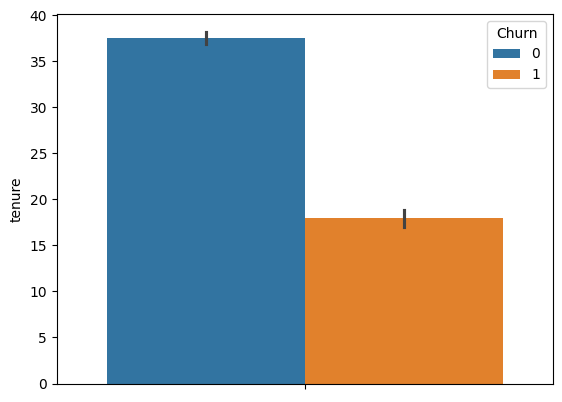

In [ ]:
sns.barplot(y = "tenure",hue = "Churn"  ,data = merged_df)
plt.show()

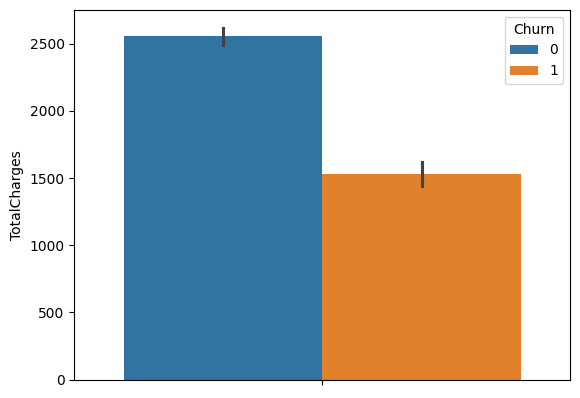

In [ ]:
sns.barplot(y = "TotalCharges",hue = "Churn"  ,data = merged_df)
plt.show()

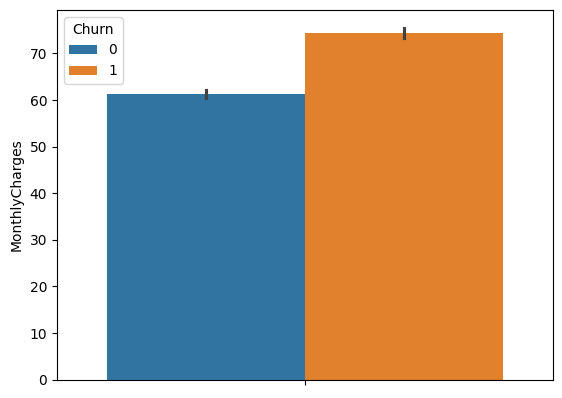

In [ ]:
sns.barplot(y = "MonthlyCharges",hue = "Churn"  ,data = merged_df)
plt.show()

InternetService     1     2     0
Churn                            
0                1962  1799  1413
1                 459  1297   113


<Axes: xlabel='Churn'>

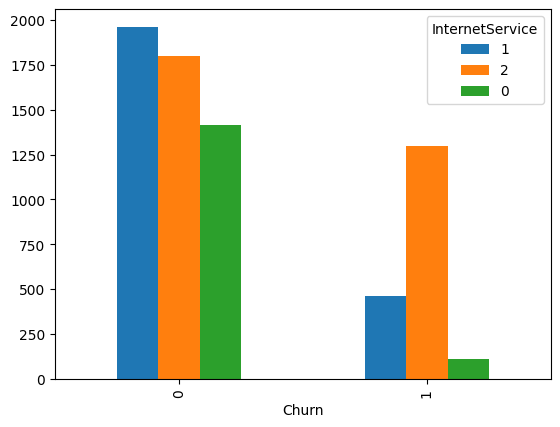

In [ ]:
CrosstabResult=pd.crosstab(index=merged_df['Churn'],columns=merged_df['InternetService'])
print(CrosstabResult)
CrosstabResult.plot.bar()

TechSupport     0     1
Churn                  
0            3440  1734
1            1559   310


<Axes: xlabel='Churn'>

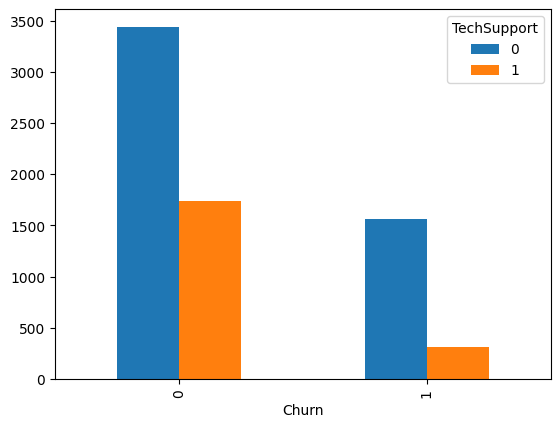

In [ ]:
CrosstabResult=pd.crosstab(index=merged_df['Churn'],columns=merged_df['TechSupport'])
print(CrosstabResult)
CrosstabResult.plot.bar()

StreamingMovies     0     1
Churn                      
0                3260  1914
1                1051   818


<Axes: xlabel='Churn'>

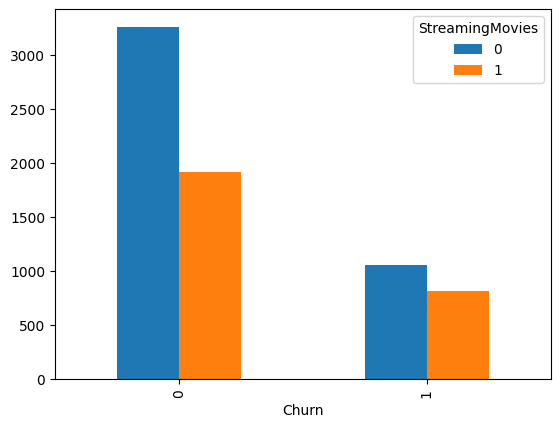

In [ ]:
CrosstabResult=pd.crosstab(index=merged_df['Churn'],columns=merged_df['StreamingMovies'])
print(CrosstabResult)
CrosstabResult.plot.bar()

PaymentMethod     2     3     0     1
Churn                                
0              1286  1290  1294  1304
1               258   232  1071   308


<Axes: xlabel='Churn'>

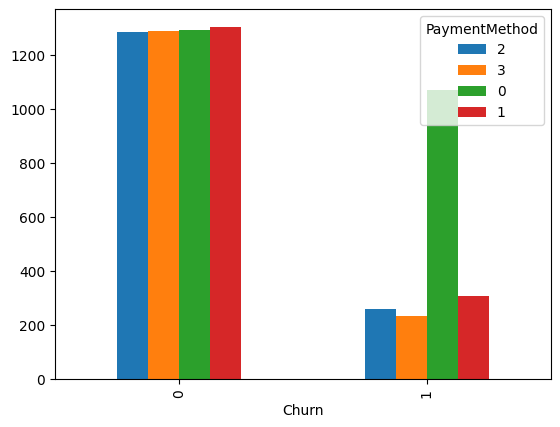

In [ ]:
CrosstabResult=pd.crosstab(index=merged_df['Churn'],columns=merged_df['PaymentMethod'])
print(CrosstabResult)
CrosstabResult.plot.bar()

Churn             0     1
SeniorCitizen            
0              4508  1393
1               666   476


<Axes: xlabel='SeniorCitizen'>

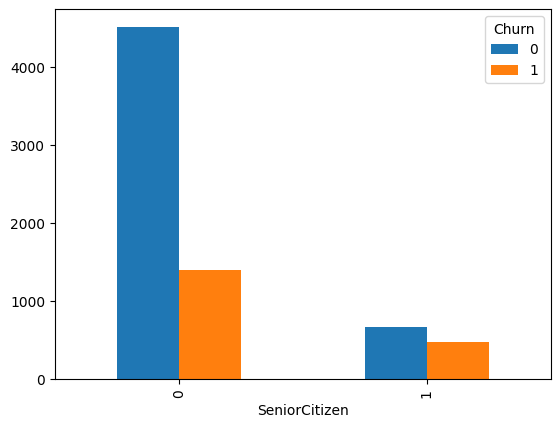

In [ ]:
CrosstabResult=pd.crosstab(columns =merged_df['Churn'],index = merged_df['SeniorCitizen'])
print(CrosstabResult)
CrosstabResult.plot.bar()

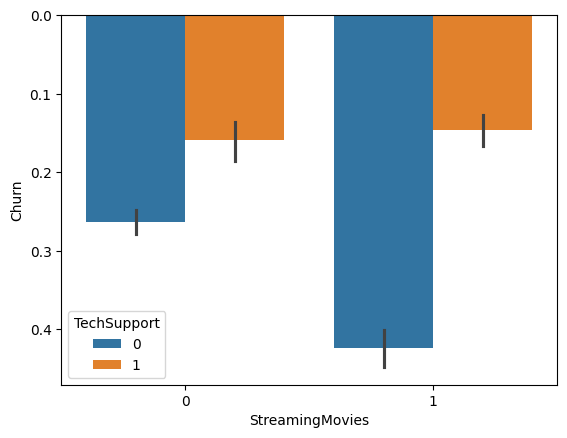

In [ ]:
sns.barplot(x = "StreamingMovies",hue = "TechSupport", y = "Churn"  ,data = merged_df)
plt.show()



*   The Gradient boost model delivered **good performance metrics** and the execution time of the model is less comapred to the Random forest model
*   The overall performance of the **Gradient boost model is better** compared to the other Ensemble technique model

*   The **new younger customers with Month-to-month contract,high monthly charges,payment cone using echeck and  without contract were the most who canclled the contract** with the Telecom company
*   Poor Moviestreaming and Technical support are the challenges in retaining older customers


